## Here are four ways you can use t-SNE in Julia
Disclaimer: I've only tested all these on a MacOS. If you have issues with getting these to run on other operating systems feel free to post an issue or submit a pull request if you had to change anything to make this code work on another OS.

In [1]:
# just a few packages we will use throughout this notebook
using TSne, 
    Statistics, 
    MLDatasets, 
    BenchmarkTools, 
    Plots, 
    RDatasets, 
    LinearAlgebra, 
    PyCall, 
    ScikitLearn, 
    ColorSchemes

# my plotting function for producing visually appealing plots
function my_tsne_plot(Y,d,labels)
    colorsvec = get(ColorSchemes.tab10, labels, :extrema)
    plot(legend=false,axis=false,grid=false)
    tsneplot = scatter!(Y[:,1], Y[:,2], 
                            marker=(2,2,:auto,stroke(0)),alpha=0.8,
                            background_color=:black,
                            color=colorsvec)
    for i = 0:9
        mx,my = mean(Y[findall(labels.==i),:],dims=1)
        s = Shape(mx.+[-d,d,d,-d],my.+[-d,-d,d,d])
        plot!(s,color=ColorSchemes.tab10[i+1],linewidth=0,alpha=0.9)
        annotate!(mx,my,text(string(i),color=:white))
    end
    return tsneplot
end

# get the data ready... we will use the MNISt dataset
alldata, labels = MNIST.traindata(Float64);
data = reshape(permutedims(alldata[:, :, 1:3000], (3, 1, 2)),
               3000, size(alldata, 1)*size(alldata, 2));
labels = labels[1:3000]
@show size(data);

size(data) = (3000, 784)


### 📌Option 1 is to use the existing Julia package [TSne.jl](https://github.com/lejon/TSne.jl)
Caveat: It hasn't been tested on Julia v1.0+ on the package page so I'm not sure if there will be instances when it will fail.

In [2]:
using TSne
# taken from the TSne package page

rescale(A; dims=1) = (A .- mean(A, dims=dims)) ./ max.(std(A, dims=dims), eps())
# Normalize the data, this should be done if there are large scale differences in the dataset
X = rescale(data, dims=1);
Y1 = tsne(X, 2, 50, 1000, 20.0);

┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1
Computing point perplexities100%|███████████████████████| Time: 0:00:02
Computing t-SNE  0%|                                    |  ETA: 0:03:57
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  1%|▎                                   |  ETA: 0:00:57
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  1%|▍                                   |  ETA: 0:00:42
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  2%|▋                                   |  ETA: 0:00:36
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  2%|▊                                   |  ETA: 0:00:34
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  2%|▉                                   |  ETA: 0:00:32
4m  KL_divergence:  5.0512 (warmup)
Computing t-SNE  3%|█                                   |  ETA: 0:00:31
4m  KL_divergence:  5.0512 (warmup)
Computin

4m  KL_divergence:  4.2295 (warmup)
Computing t-SNE 25%|█████████▏                          |  ETA: 0:00:21
4m  KL_divergence:  4.2295
Computing t-SNE 26%|█████████▎                          |  ETA: 0:00:21
4m  KL_divergence:  4.2295
Computing t-SNE 26%|█████████▍                          |  ETA: 0:00:21
4m  KL_divergence:  4.2295
Computing t-SNE 27%|█████████▋                          |  ETA: 0:00:21
4m  KL_divergence:  4.2295
Computing t-SNE 27%|█████████▊                          |  ETA: 0:00:21
4m  KL_divergence:  4.2295
Computing t-SNE 27%|█████████▉                          |  ETA: 0:00:20
4m  KL_divergence:  4.2295
Computing t-SNE 28%|██████████                          |  ETA: 0:00:20
4m  KL_divergence:  4.2295
Computing t-SNE 28%|██████████▏                         |  ETA: 0:00:20
4m  KL_divergence:  4.2295
Computing t-SNE 29%|██████████▍                         |  ETA: 0:00:20
4m  KL_divergence:  4.2295
Computing t-SNE 29%|██████████▌                         |  ETA: 0:00:20
4

4m  KL_divergence:  1.2987
Computing t-SNE 56%|████████████████████▏               |  ETA: 0:00:12
4m  KL_divergence:  1.2987
Computing t-SNE 56%|████████████████████▎               |  ETA: 0:00:12
4m  KL_divergence:  1.2987
Computing t-SNE 57%|████████████████████▍               |  ETA: 0:00:12
4m  KL_divergence:  1.2987
Computing t-SNE 57%|████████████████████▌               |  ETA: 0:00:12
4m  KL_divergence:  1.2987
Computing t-SNE 57%|████████████████████▋               |  ETA: 0:00:12
4m  KL_divergence:  1.2987
Computing t-SNE 58%|████████████████████▉               |  ETA: 0:00:11
4m  KL_divergence:  1.2987
Computing t-SNE 58%|█████████████████████               |  ETA: 0:00:11
4m  KL_divergence:  1.2987
Computing t-SNE 59%|█████████████████████▎              |  ETA: 0:00:11
4m  KL_divergence:  1.2987
Computing t-SNE 59%|█████████████████████▍              |  ETA: 0:00:11
4m  KL_divergence:  1.2987
Computing t-SNE 60%|█████████████████████▌              |  ETA: 0:00:11
4m  KL_div

4m  KL_divergence:  1.2073
Computing t-SNE 86%|███████████████████████████████     |  ETA: 0:00:04
4m  KL_divergence:  1.2073
Computing t-SNE 87%|███████████████████████████████▏    |  ETA: 0:00:04
4m  KL_divergence:  1.2073
Computing t-SNE 87%|███████████████████████████████▍    |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 88%|███████████████████████████████▌    |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 88%|███████████████████████████████▋    |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 88%|███████████████████████████████▉    |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 89%|████████████████████████████████    |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 89%|████████████████████████████████▏   |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 90%|████████████████████████████████▍   |  ETA: 0:00:03
4m  KL_divergence:  1.2073
Computing t-SNE 90%|████████████████████████████████▍   |  ETA: 0:00:03
4m  KL_div

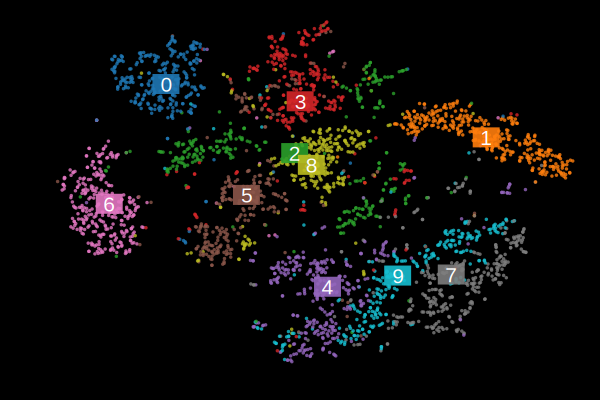

In [3]:
my_tsne_plot(Y1,5,labels)

### 📌Option 2 is to use the ScikitLearn implementation

In [4]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);

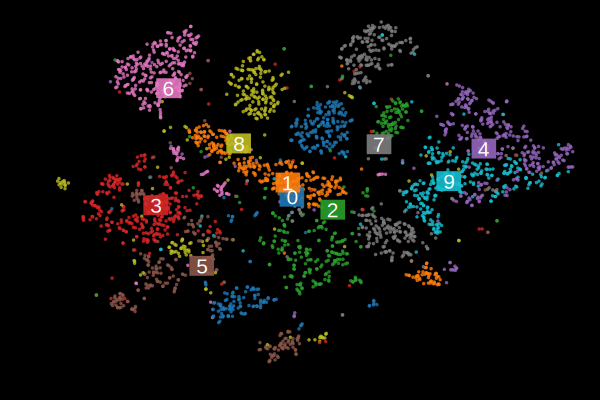

In [14]:
my_tsne_plot(Y2,4,labels)

### 📌Option 3 is to use the [BHTsne.jl](https://github.com/zhmz90/BHTsne.jl) package. 
- The package is currently outdated and won't work on Julia 1.0+. 
- I submitted a pull request to make a few changes to the code. 
- Until the request is accepted, you can use my fork here: https://github.com/nassarhuda/BHTsne.jl.

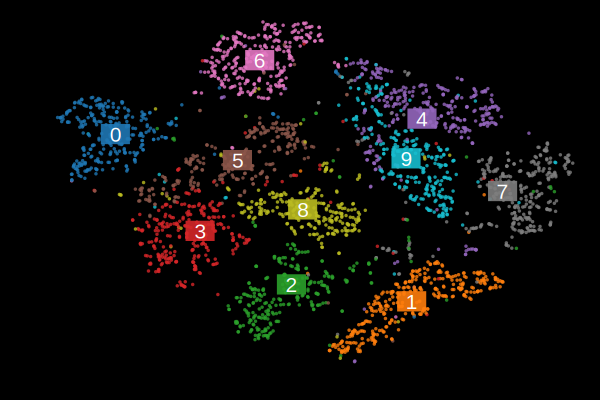

In [6]:
using BHTsne
Y3 = bh_tsne(data, perplexity=20, verbose=false)
my_tsne_plot(Y3,2.5,labels)

### 📌Option 4 - Julia wrapper of the C++ Barnes-Hut implementation of the t-SNE algorithm 
- I use the C++ implementation here: https://github.com/lvdmaaten/bhtsne
- Unlike option 3, this avoids reading and writing to a file and simply calls the C++ code from within Julia

#### Before you can use this option, you need to generate the shared library. I've used the code from [here](https://github.com/lvdmaaten/bhtsne) and added a Makefile and modified the cpp code to allow for C linkage. 

The folder is `bhtsne` and all you need to do is:
```
$ cd bhtsne
$ make clean
$ make
``` 
and a shared library `sharedlib_tsne` will be generated. Then the code below should work.

In [7]:
function tsne_wrapper(samples,no_dims,initial_dims,perplexity,theta,maxit)

    samples = broadcast(-, samples, mean(samples,dims=1));
    cov_x = samples' * samples
    eig_val,eig_vec = eigen(cov_x)

    eig_vec = eig_vec[:,sortperm(eig_val,rev=true)]

    num_eigvec = size(eig_vec, 2)
    if initial_dims > num_eigvec
        initial_dims = num_eigvec
    end

    eig_vec = eig_vec[:,1:initial_dims]
    samples = samples * eig_vec

    N,D = size(samples)
    data = copy(samples')
    Y = zeros(N*no_dims)
    
    ccall(("run","bhtsne/sharedlib_tsne.dylib"),
        Cvoid,
        (Ptr{Cdouble},Cint,Cint,Ptr{Cdouble},Cint,Cdouble,Cdouble,Cint,Cuchar,Cint,Cint,Cint),
        data, N, D, Y, no_dims, perplexity, theta, -1, false, maxit, 250, 250)

    results = reshape(Y,2,N)'
    return results
end

tsne_wrapper (generic function with 1 method)

Using current time as random seed...
Using no_dims = 2, perplexity = 20.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 3000
Input similarities computed in 0.96 seconds (sparsity = 0.026912)!
Learning embedding...
Iteration 50: error is 88.067151 (50 iterations in 1.14 seconds)
Iteration 100: error is 80.654286 (50 iterations in 1.30 seconds)
Iteration 150: error is 79.928649 (50 iterations in 1.05 seconds)
Iteration 200: error is 79.884409 (50 iterations in 1.00 seconds)
Iteration 250: error is 4.170960 (50 iterations in 1.04 seconds)
Iteration 300: error is 2.228564 (50 iterations in 0.94 seconds)
Iteration 350: error is 1.843214 (50 iterations in 0.96 seconds)
Iteration 400: error is 1.663301 (50 iterations in 0.96 seconds)
Iteration 450: error is 1.559748 (50 iterations in 1.01 seconds)
Iteration 500: error is 1.499671 (50 iterations in 1.03 seconds)
Iteration 550: error is 1.464386 (50 iterations in 1.03 seconds)
Iteration 600: error is 

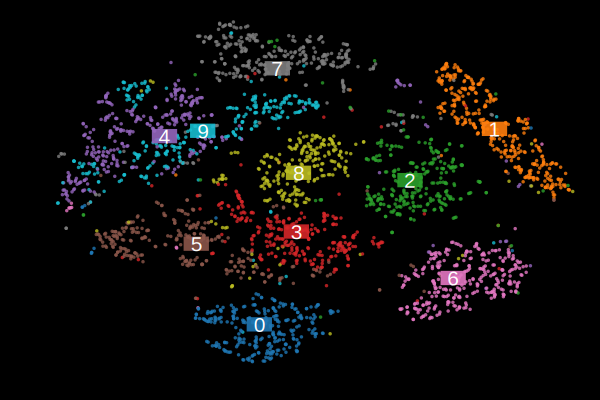

In [8]:
no_dims = 2
initial_dims = 50
perplexity=20.0
theta = 0.5
maxit = 1000
Y4 = tsne_wrapper(data,no_dims,initial_dims,perplexity,theta,maxit)
my_tsne_plot(Y4,2,labels)

### Now I will benchmark all of these options and show the results below. My personal preference is option 4 as it has a fair combination of fast speed and few allocations.

In [9]:
B1 = @benchmark tsne(X, 2, 50, 1000, 20.0);
B2 = @benchmark tfn.fit_transform(data);
B3 = @benchmark bh_tsne(data, perplexity=20, verbose=false);
B4 = @benchmark tsne_wrapper(data,no_dims,initial_dims,perplexity,theta,maxit);

Computing point perplexities100%|███████████████████████| Time: 0:00:02
Computing t-SNE  0%|                                    |  ETA: 0:04:20
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  1%|▎                                   |  ETA: 0:01:02
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  1%|▍                                   |  ETA: 0:00:44
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  2%|▋                                   |  ETA: 0:00:37
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  2%|▊                                   |  ETA: 0:00:34
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  3%|▉                                   |  ETA: 0:00:32
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  3%|█▏                                  |  ETA: 0:00:31
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  3%|█▎                                  |  ETA: 0:00:30
4m  KL_divergence:  5.0541 (warmup)
Computing t-SNE  4%|█▍                                  |  ETA: 

4m  KL_divergence:  4.1982
Computing t-SNE 27%|█████████▋                          |  ETA: 0:00:21
4m  KL_divergence:  4.1982
Computing t-SNE 27%|█████████▊                          |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 28%|█████████▉                          |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 28%|██████████                          |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 28%|██████████▎                         |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 29%|██████████▍                         |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 29%|██████████▌                         |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 30%|██████████▋                         |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 30%|██████████▊                         |  ETA: 0:00:20
4m  KL_divergence:  4.1982
Computing t-SNE 30%|██████████▉                         |  ETA: 0:00:20
4m  KL_div

4m  KL_divergence:  1.2632
Computing t-SNE 55%|████████████████████                |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 56%|████████████████████▏               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 56%|████████████████████▎               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 57%|████████████████████▌               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 57%|████████████████████▋               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 58%|████████████████████▊               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 58%|████████████████████▉               |  ETA: 0:00:12
4m  KL_divergence:  1.2632
Computing t-SNE 58%|█████████████████████               |  ETA: 0:00:11
4m  KL_divergence:  1.2632
Computing t-SNE 59%|█████████████████████▏              |  ETA: 0:00:11
4m  KL_divergence:  1.2632
Computing t-SNE 59%|█████████████████████▍              |  ETA: 0:00:11
4m  KL_div

4m  KL_divergence:  1.1858
Computing t-SNE 85%|██████████████████████████████▋     |  ETA: 0:00:04
4m  KL_divergence:  1.1790
Computing t-SNE 86%|██████████████████████████████▊     |  ETA: 0:00:04
4m  KL_divergence:  1.1790
Computing t-SNE 86%|██████████████████████████████▉     |  ETA: 0:00:04
4m  KL_divergence:  1.1790
Computing t-SNE 86%|███████████████████████████████▏    |  ETA: 0:00:04
4m  KL_divergence:  1.1790
Computing t-SNE 87%|███████████████████████████████▎    |  ETA: 0:00:04
4m  KL_divergence:  1.1790
Computing t-SNE 87%|███████████████████████████████▍    |  ETA: 0:00:03
4m  KL_divergence:  1.1790
Computing t-SNE 88%|███████████████████████████████▋    |  ETA: 0:00:03
4m  KL_divergence:  1.1790
Computing t-SNE 88%|███████████████████████████████▊    |  ETA: 0:00:03
4m  KL_divergence:  1.1790
Computing t-SNE 89%|███████████████████████████████▉    |  ETA: 0:00:03
4m  KL_divergence:  1.1790
Computing t-SNE 89%|████████████████████████████████    |  ETA: 0:00:03
4m  KL_div

4m  KL_divergence:  4.2200 (warmup)
Computing t-SNE 14%|████▉                               |  ETA: 0:00:23
4m  KL_divergence:  4.2200 (warmup)
Computing t-SNE 14%|█████▏                              |  ETA: 0:00:23
4m  KL_divergence:  4.2200 (warmup)
Computing t-SNE 14%|█████▎                              |  ETA: 0:00:22
4m  KL_divergence:  4.2200 (warmup)
Computing t-SNE 15%|█████▍                              |  ETA: 0:00:22
4m  KL_divergence:  4.2200 (warmup)
Computing t-SNE 15%|█████▍                              |  ETA: 0:00:23
4m  KL_divergence:  4.2097 (warmup)
Computing t-SNE 16%|█████▋                              |  ETA: 0:00:23
4m  KL_divergence:  4.2097 (warmup)
Computing t-SNE 16%|█████▊                              |  ETA: 0:00:22
4m  KL_divergence:  4.2097 (warmup)
Computing t-SNE 16%|█████▉                              |  ETA: 0:00:22
4m  KL_divergence:  4.2097 (warmup)
Computing t-SNE 17%|██████                              |  ETA: 0:00:22
4m  KL_divergence:  4.2097 (

4m  KL_divergence:  1.4661
Computing t-SNE 42%|███████████████▎                    |  ETA: 0:00:16
4m  KL_divergence:  1.4661
Computing t-SNE 43%|███████████████▍                    |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 43%|███████████████▌                    |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 44%|███████████████▊                    |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 44%|███████████████▉                    |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 44%|████████████████                    |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 45%|████████████████▏                   |  ETA: 0:00:15
4m  KL_divergence:  1.4661
Computing t-SNE 45%|████████████████▎                   |  ETA: 0:00:15
4m  KL_divergence:  1.3647
Computing t-SNE 45%|████████████████▍                   |  ETA: 0:00:15
4m  KL_divergence:  1.3647
Computing t-SNE 46%|████████████████▌                   |  ETA: 0:00:15
4m  KL_div

4m  KL_divergence:  1.1951
Computing t-SNE 73%|██████████████████████████▏         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 73%|██████████████████████████▎         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 73%|██████████████████████████▍         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 74%|██████████████████████████▋         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 74%|██████████████████████████▊         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 75%|██████████████████████████▉         |  ETA: 0:00:07
4m  KL_divergence:  1.1951
Computing t-SNE 75%|███████████████████████████         |  ETA: 0:00:07
4m  KL_divergence:  1.1829
Computing t-SNE 75%|███████████████████████████▏        |  ETA: 0:00:07
4m  KL_divergence:  1.1829
Computing t-SNE 76%|███████████████████████████▎        |  ETA: 0:00:06
4m  KL_divergence:  1.1829
Computing t-SNE 76%|███████████████████████████▍        |  ETA: 0:00:06
4m  KL_div

4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  1%|▎                                   |  ETA: 0:00:59
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  1%|▍                                   |  ETA: 0:00:42
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  2%|▋                                   |  ETA: 0:00:36
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  2%|▊                                   |  ETA: 0:00:34
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  2%|▉                                   |  ETA: 0:00:32
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  3%|█▏                                  |  ETA: 0:00:30
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  4%|█▎                                  |  ETA: 0:00:29
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  4%|█▌                                  |  ETA: 0:00:28
4m  KL_divergence:  5.0517 (warmup)
Computing t-SNE  4%|█▋                                  |  ETA: 0:00:27
4m  KL_divergence:  5.0517 (

4m  KL_divergence:  4.2035
Computing t-SNE 30%|██████████▊                         |  ETA: 0:00:19
4m  KL_divergence:  2.0797
Computing t-SNE 30%|███████████                         |  ETA: 0:00:19
4m  KL_divergence:  2.0797
Computing t-SNE 31%|███████████▏                        |  ETA: 0:00:19
4m  KL_divergence:  2.0797
Computing t-SNE 31%|███████████▎                        |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 32%|███████████▌                        |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 32%|███████████▋                        |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 33%|███████████▊                        |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 33%|███████████▉                        |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 34%|████████████▏                       |  ETA: 0:00:18
4m  KL_divergence:  2.0797
Computing t-SNE 34%|████████████▎                       |  ETA: 0:00:18
4m  KL_div

4m  KL_divergence:  1.2580
Computing t-SNE 60%|█████████████████████▋              |  ETA: 0:00:11
4m  KL_divergence:  1.2327
Computing t-SNE 60%|█████████████████████▊              |  ETA: 0:00:11
4m  KL_divergence:  1.2327
Computing t-SNE 61%|█████████████████████▉              |  ETA: 0:00:11
4m  KL_divergence:  1.2327
Computing t-SNE 61%|██████████████████████              |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 62%|██████████████████████▏             |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 62%|██████████████████████▍             |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 62%|██████████████████████▌             |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 63%|██████████████████████▋             |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 63%|██████████████████████▊             |  ETA: 0:00:10
4m  KL_divergence:  1.2327
Computing t-SNE 64%|███████████████████████             |  ETA: 0:00:10
4m  KL_div

4m  KL_divergence:  1.1743
Computing t-SNE 88%|███████████████████████████████▉    |  ETA: 0:00:03
4m  KL_divergence:  1.1743
Computing t-SNE 89%|████████████████████████████████    |  ETA: 0:00:03
4m  KL_divergence:  1.1743
Computing t-SNE 89%|████████████████████████████████▏   |  ETA: 0:00:03
4m  KL_divergence:  1.1743
Computing t-SNE 90%|████████████████████████████████▎   |  ETA: 0:00:03
4m  KL_divergence:  1.1743
Computing t-SNE 90%|████████████████████████████████▍   |  ETA: 0:00:03
4m  KL_divergence:  1.1686
Computing t-SNE 90%|████████████████████████████████▌   |  ETA: 0:00:03
4m  KL_divergence:  1.1686
Computing t-SNE 91%|████████████████████████████████▊   |  ETA: 0:00:03
4m  KL_divergence:  1.1686
Computing t-SNE 91%|████████████████████████████████▉   |  ETA: 0:00:02
4m  KL_divergence:  1.1686
Computing t-SNE 92%|█████████████████████████████████   |  ETA: 0:00:02
4m  KL_divergence:  1.1686
Computing t-SNE 92%|█████████████████████████████████▏  |  ETA: 0:00:02
4m  KL_div

4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 16%|█████▊                              |  ETA: 0:00:24
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 16%|█████▉                              |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 17%|██████                              |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 17%|██████▏                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 17%|██████▎                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 18%|██████▍                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 18%|██████▌                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 18%|██████▋                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (warmup)
Computing t-SNE 19%|██████▊                             |  ETA: 0:00:23
4m  KL_divergence:  4.3030 (

4m  KL_divergence:  1.3561
Computing t-SNE 46%|████████████████▍                   |  ETA: 0:00:15
4m  KL_divergence:  1.3561
Computing t-SNE 46%|████████████████▌                   |  ETA: 0:00:15
4m  KL_divergence:  1.3561
Computing t-SNE 46%|████████████████▊                   |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 47%|████████████████▉                   |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 47%|█████████████████▏                  |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 48%|█████████████████▎                  |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 48%|█████████████████▍                  |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 49%|█████████████████▋                  |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 49%|█████████████████▊                  |  ETA: 0:00:14
4m  KL_divergence:  1.3561
Computing t-SNE 50%|█████████████████▉                  |  ETA: 0:00:13
4m  KL_div

4m  KL_divergence:  1.1977
Computing t-SNE 75%|███████████████████████████         |  ETA: 0:00:07
4m  KL_divergence:  1.1873
Computing t-SNE 75%|███████████████████████████▏        |  ETA: 0:00:07
4m  KL_divergence:  1.1873
Computing t-SNE 76%|███████████████████████████▎        |  ETA: 0:00:07
4m  KL_divergence:  1.1873
Computing t-SNE 76%|███████████████████████████▍        |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 77%|███████████████████████████▋        |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 77%|███████████████████████████▊        |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 77%|███████████████████████████▉        |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 78%|████████████████████████████        |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 78%|████████████████████████████▏       |  ETA: 0:00:06
4m  KL_divergence:  1.1873
Computing t-SNE 79%|████████████████████████████▍       |  ETA: 0:00:06
4m  KL_div

Using current time as random seed...
Using no_dims = 2, perplexity = 20.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 3000
Input similarities computed in 0.95 seconds (sparsity = 0.026912)!
Learning embedding...
Iteration 50: error is 88.065291 (50 iterations in 1.11 seconds)
Iteration 100: error is 80.858080 (50 iterations in 1.00 seconds)
Iteration 150: error is 79.793051 (50 iterations in 0.87 seconds)
Iteration 200: error is 79.764843 (50 iterations in 0.89 seconds)
Iteration 250: error is 4.162582 (50 iterations in 0.90 seconds)
Iteration 300: error is 2.234245 (50 iterations in 0.86 seconds)
Iteration 350: error is 1.846142 (50 iterations in 0.91 seconds)
Iteration 400: error is 1.663937 (50 iterations in 0.92 seconds)
Iteration 450: error is 1.563104 (50 iterations in 0.96 seconds)
Iteration 500: error is 1.507679 (50 iterations in 0.97 seconds)
Iteration 550: error is 1.477675 (50 iterations in 0.95 seconds)
Iteration 600: error is 

In [10]:
B1

BenchmarkTools.Trial: 
  memory estimate:  405.66 MiB
  allocs estimate:  95844
  --------------
  minimum time:     29.241 s (0.48% GC)
  median time:      29.241 s (0.48% GC)
  mean time:        29.241 s (0.48% GC)
  maximum time:     29.241 s (0.48% GC)
  --------------
  samples:          1
  evals/sample:     1

In [11]:
B2

BenchmarkTools.Trial: 
  memory estimate:  25.58 KiB
  allocs estimate:  41
  --------------
  minimum time:     28.653 s (0.00% GC)
  median time:      28.653 s (0.00% GC)
  mean time:        28.653 s (0.00% GC)
  maximum time:     28.653 s (0.00% GC)
  --------------
  samples:          1
  evals/sample:     1

In [12]:
B3

BenchmarkTools.Trial: 
  memory estimate:  138.83 MiB
  allocs estimate:  2349256
  --------------
  minimum time:     19.068 s (0.45% GC)
  median time:      19.068 s (0.45% GC)
  mean time:        19.068 s (0.45% GC)
  maximum time:     19.068 s (0.45% GC)
  --------------
  samples:          1
  evals/sample:     1

In [13]:
B4

BenchmarkTools.Trial: 
  memory estimate:  44.32 MiB
  allocs estimate:  43
  --------------
  minimum time:     20.071 s (0.01% GC)
  median time:      20.071 s (0.01% GC)
  mean time:        20.071 s (0.01% GC)
  maximum time:     20.071 s (0.01% GC)
  --------------
  samples:          1
  evals/sample:     1